In [1]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import hellinger_fidelity
import matplotlib.pyplot as plt
import seaborn as sns

from qiskit.visualization import plot_histogram
import random

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer,execute
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info.analysis import hellinger_fidelity
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.add_control import add_control
from qiskit.circuit.library import UnitaryGate
# import basic plot tools

from qiskit.visualization import plot_histogram

# from noise_mitigation_symmetry import checksfinder

import math
import random
import plotly.express as px
import pandas as pd

In [3]:
def original_bv_circuit(bitstring):
    n = len(bitstring)
    qubits = QuantumRegister(n+1)
    classical_regs = ClassicalRegister(n)
    qc = QuantumCircuit()
    qc.add_register(qubits)
    qc.add_register(classical_regs)
    qc.x(n)
    qc.barrier(qubits)
    for i in range(n+1):
        qc.h(i)
    qc.barrier(qubits)
    for i in range(n):
        if(bitstring[i] == '1'):
            qc.cx(i,n)
    qc.barrier(qubits)
    for i in range(n+1):
        qc.h(i)

    for i in range(n):
        qc.measure(qubits[i],classical_regs[n-i-1])
    return qc
    


In [4]:
def mid_circuit_bv(bitstring):
    n = len(bitstring)
    qubits = QuantumRegister(2)
    classical_regs = ClassicalRegister(n)
    qc = QuantumCircuit()
    qc.add_register(qubits)
    qc.add_register(classical_regs)
    qc.x(1)
    qc.h(1)
    qc.barrier(qubits)
    for i in range(n):
        qc.h(0)
        if(bitstring[i] == '1'):
            qc.cx(0,1)
        qc.h(0)
        qc.measure(0,classical_regs[n-i-1])
        qc.barrier(qubits)
        qc.reset(0)
        qc.reset(1)
        qc.x(1)
        qc.h(1)

    return qc


In [5]:
bitstring = '01'*3
print(bitstring)
print(len(bitstring))
print(bitstring[1])

010101
6
1


/home/smohapa5/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


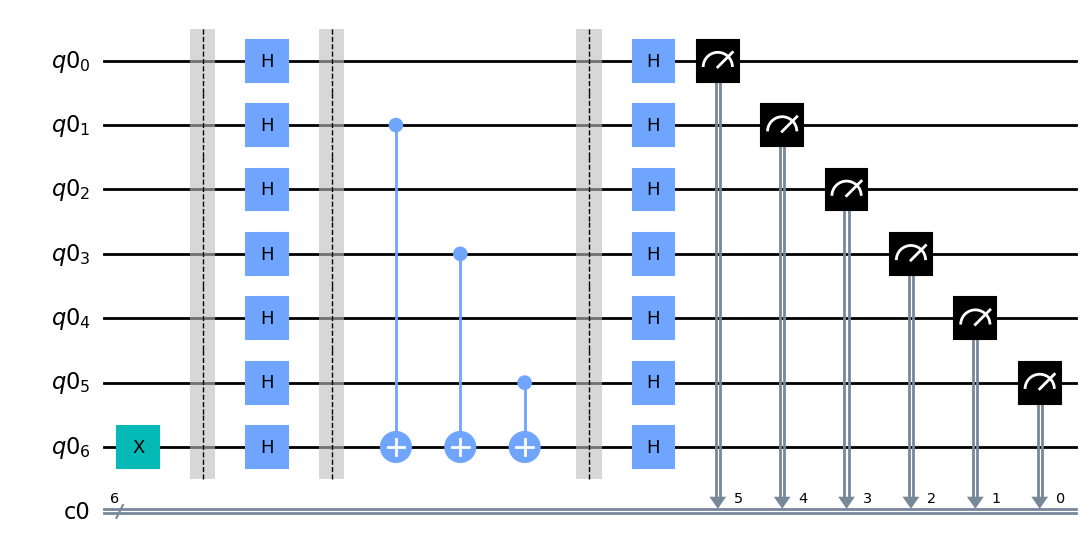

In [6]:
qc = original_bv_circuit(bitstring)
qc.draw('mpl')

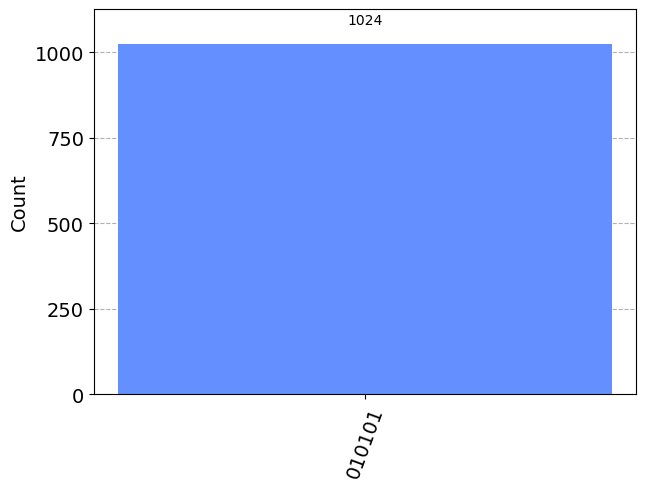

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_sim)
result = qasm_sim.run(transpiled_qc).result()
plot_histogram(result.get_counts())

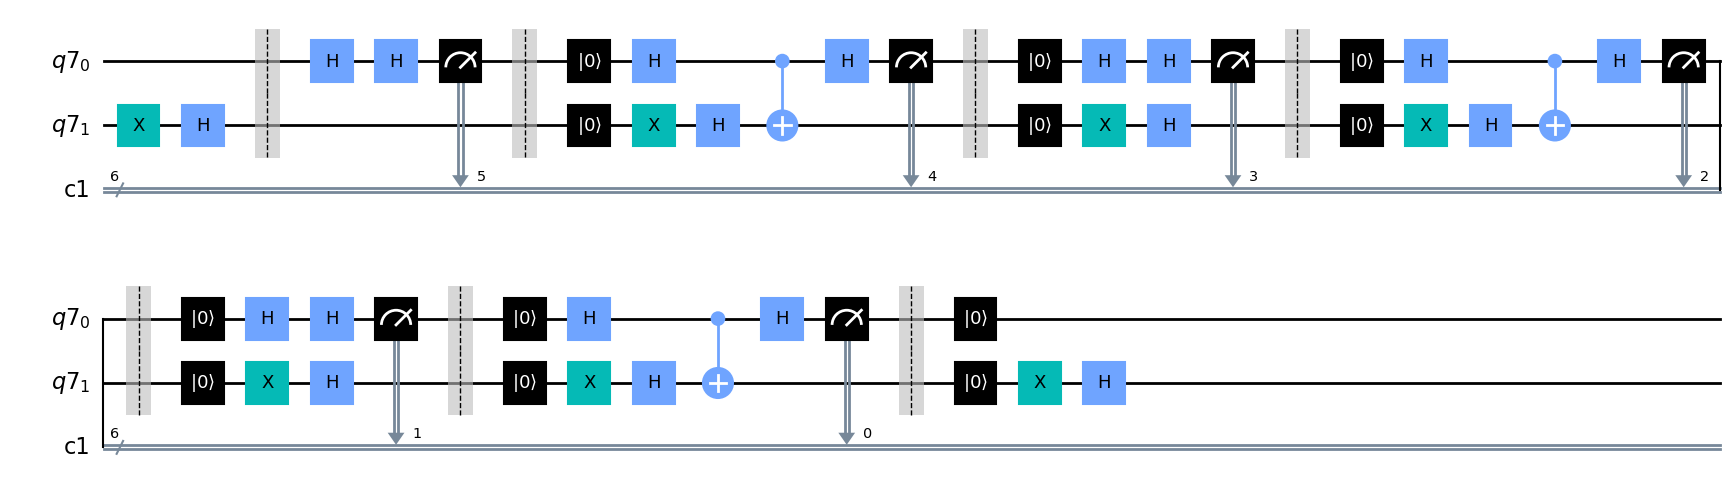

In [8]:
qc = mid_circuit_bv(bitstring)
qc.draw('mpl')

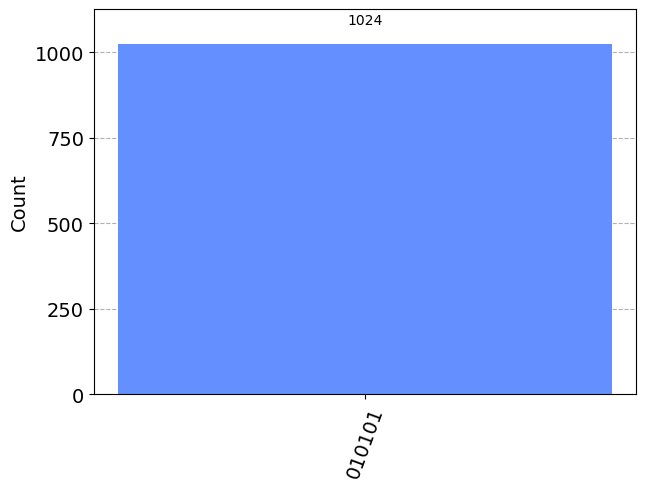

In [9]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_sim)
result = qasm_sim.run(transpiled_qc).result()
plot_histogram(result.get_counts())

In [10]:
def generate_random_bitstring(length):
    bitstring = ''.join(random.choice('01') for _ in range(length))  # Generate random bits
    return bitstring


In [11]:
def ideal_simulation(qc):
    qasm_sim = Aer.get_backend('qasm_simulator')
    transpiled_qc = transpile(qc, qasm_sim)
    result = qasm_sim.run(transpiled_qc).result()
    return (result.get_counts())

In [13]:
tries = 10
bit_lengths = [1, 5, 10, 15, 20]
fidelity = []
for length in bit_lengths:
    sum_fidelity = 0.0
    for i in range(tries):
        string = (generate_random_bitstring(length))
        qc1 = original_bv_circuit(string)
        qc2 = mid_circuit_bv(string)

        result1 = ideal_simulation(qc1)
        result2 = ideal_simulation(qc2)
        sum_fidelity = sum_fidelity + hellinger_fidelity(result1,result2)
    avg_fidelity = sum_fidelity/tries
    fidelity.append(avg_fidelity)

        

In [14]:
print(fidelity)

[1.0, 1.0, 1.0, 1.0, 1.0]
